# **Buck Converters**

**Author: Melika Dehestani**

**Gmail:** dehestanimelika2004@gmail.com 

**Fall 2024**

## **Introduction**

A buck converter or step-down converter is a DC-to-DC converter. In other words it is a type of switching regulator,which is a power supply that converts input DC voltage to a desired DC voltage with high efficiency. It achieves this by turning a switching element ON and OFF, supplying electricity only as needed, unlike less efficient linear regulators which dissipate excess energy as heat (linear regulators have a constant output while switching output changes in its time priod). The primary advantages of a switching power supply are efficiency, size, and weight. It also has a more complex design, cannot meet some of the performance capabilities of linear supplies, and generates a considerable amount of electrical noise. However, switchers are being accepted in industry, particularly where size and efficiency are of prime importance. Performance continues to improve, and for most applications, they are usually cost competitive down to the 20-W power level. 

A buck converter decreases voltage, while increasing current, from its input (supply) to its output (load). The primary advantage of the buck converter is its simplicity, which enables efficient voltage conversion using a relatively small number of components. The forward converter family, which includes the push-pull and half-bridge circuits, evolved from the buck regulator.



## **Principle of operation**

The operating principle of the buck converter involves controlled energy transfer from the input to the output through switches, an inductor, and a capacitor. A high-side switch (usually a MOSFET) and a low-side switch (typically a diode) are employed in the buck converter to control the current flow through the inductor. By adjusting the duty cycle of the high-side switch, which we will go further into in the future parts, the average output voltage can be regulated proportionally to the input voltage.

When the high-side switch of a buck converter is switched on, it allows current to flow through the inductor this means that our current increases, which stores energy in its magnetic field. The inductore gains a polarity in which the left side is positive and the right side negative thus reduces the voltage seen by the load resistor. This stored energy is then transferred to the output, charging the output capacitor and powering the load. D is also in reversed biased so current does not flow through it. 

When the high-side switch is turned off and the low-side switch is turned on (we open the switch), the inductor's magnetic field collapses because the current decreases, releasing the stored energy. This causes the polarity of the inductor to change. The inductor will act like a current source. If the voltage across the inductor is greater than the capacitor, it will charge the capasitor, otherwise they will both dischrage themselves through the load. current will also flow through the diode since it is in forward bias.

The buck converter is designed to operate within a closed-loop control system, where a feedback mechanism continuously compares the output voltage to a reference voltage to ensure that the output voltage remains stable and regulated, regardless of changes in input voltage or load conditions.



## **Simple buck converter schematic (switch closed)**

The code below shows the schematic of a simple buck booster using schemdraw, which consists of a source of DC power supply E, a switch S (typically a MOSFET or IGBT), a diode D, low frequency bandpass LC filter and load R:

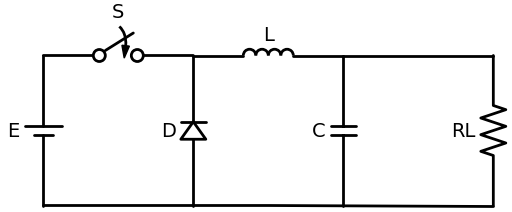

In [5]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    battery=elm.BatteryCell().reverse().up().label("E")
    elm.Switch(action='close').right().label("S")
    d.push()
    elm.Diode().reverse().down().label("D")
    d.pop()
    elm.Inductor().right().label("L")
    d.push()
    elm.Capacitor().down().label("C")
    d.pop()
    elm.Line().right()
    elm.Resistor().down().label("RL")
    elm.Line().left().tox(battery.start)

## **Closing the switch**
Now according to the principles of its opperation we will see how we will derive the relation between the input and output voltage:

When we close the switch, the voltage of the inductor is shown as below:
$$ V_L = E - V_{RL} $$
The current flowing through the inductor will increase linearly from the minimum to the maximum value. The diagramm below shows the Inductor Voltage and Current Versus Time:




   ![title](pics/diagram.png)





## **Simple buck converter schematic (switch opened)**
The schematic below shows how the buck converter will be if the switch is opened: 

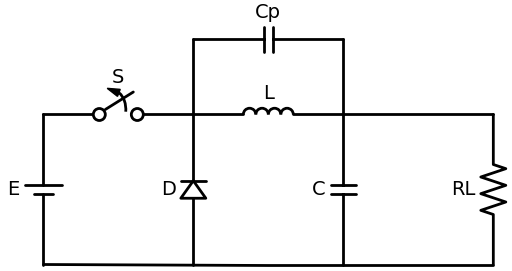

In [6]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    battery=elm.BatteryCell().reverse().up().label("E")
    elm.Switch(action='open').right().label("S")
    d.push()
    elm.Diode().reverse().down().label("D")
    d.pop()
    inductor=elm.Inductor().right().label("L")
    d.push()
    elm.Capacitor().down().label("C")
    d.pop()
    elm.Line().right()
    elm.Resistor().down().label("RL")
    elm.Line().left().tox(battery.start)
    elm.Line().length(d.unit/2).at(inductor.start).up()
    elm.Capacitor().right().label("Cp")
    elm.Line().length(d.unit/2).down()
    

## **Opening the switch**
When the switch (S) is turned off, the commutation process occurs in which the inductor’s current from the source E passes into the diode D. Commutation refers to the reversal of voltage polarity or current direction. Thus, the purpose of a commutating diode is to act whenever voltage reverses polarity, for example, on an inductor coil when current through it is interrupted.This process is shown in the figure above. For better understanding the commutation process, it is necessary to take into account that the inductor’s winding consists of a series of coils located next to each other, so that there is not only magnetic coupling between them but also capacitive coupling, which is represented by the capacitor CP. The moment before switching off (the switch S), the voltage across the inductor was:

$$ V_L = V_{Cp} = E - V_{RL} $$

After the switch S is turned off, the current through the inductor remains the same in direction and intensity and closes through the capacitor CP . In the next period, the capacitor discharges and charges to the other side. The reverse voltage of the diode is:

$$ V_D = V_{RL} + V_L =  V_{RL} + V_{Cp} $$

and becomes zero when the voltage across the capacitor CP becomes equal to the load voltage in the opposite direction. At that moment, the diode takes over the inductor's current , so the voltage across the inductor is equal to the load voltage:

$$ V_L = -V_{RL} $$

and the current through the inductor linearly decreases and reaches a minimum value at the end of the period like seen in the diagram above.





## **Ripple in current** 
When the switch is on we have the equations below using KVL:
$$ V_{L} = E - V_{RL} $$

$$ L\frac{dI_L}{dt} = E - V_{RL} $$

$$ L\int_{I_{min}}^{I_{max}} dI_L = E - V_{RL} \int_0^{t_{ON}} dt $$

$$ L ΔI_L = (E - V_{RL}) t_{ON} $$

Using the duty cycle(The duty cycle (D) is the percentage of the whole switching period when the high-side switch is ON.) we rewrite the final equation:

$$ ΔI_L = \frac {(E - V_{RL}).DT} {L} $$

The diagram below shows the relation between our inputs and outputs if our switch and diode were not ideal:

   ![title](pics/picture3.png)



So in the picture above the diffrence between our maximum i and minimum i is the ΔI_L we calculated so in conclusion we can say that the average of the inductors current is:

$$ I_{avg} = \frac {ΔI_L}{2} $$



## **Average output voltage**
We now want to derive the relation between out loads voltage and the duty cycle:
-  During t on:
$$ V_{L on} = E - V_{RL} $$
-  During t off:
$$ V_{L off} = - V_{RL} $$

So our inductors average voltage will be:
$$ V_{L avg} = V_{L on} + V_{L off} $$
$$ V_{L avg} = (E - V_{RL}).t_{ON} - V_{RL}.t_{OFF} $$

We saw in the first diagram that the surface under both t on and t off were equal, thus our inductors average voltage is 0 so:
$$ (E - V_{RL}).t_{ON} - V_{RL}.t_{OFF} = 0 $$
$$ E.t_{ON} = V_{RL}.(t_{ON}+t_{OFF}) $$
$$ \frac{t_{ON}}{T} = \frac{V_{RL}}{E} $$

And using the duty cycle we have the relation between our output voltage and duty cycle:

$$ V_{RL} = D.E $$

This means that this circuit is stepping down the volatge. 

## **Average load current**
For lossless conversion:
$$ E.I_i = V_{RL}.I_O $$

Using the equation for loads voltage we can now derive the relation between our input and output current:

$$ E.I_i = D.E.I_O $$
$$ I_O = \frac {I_i}{D} $$

We see that the current in buck converter is boosting and stepping up.



## **Capacitor selection**
The output capacitor (Cout) plays a vital role in filtering the output voltage ripple and maintaining stability in the converter. The value of Cout depends on the desired output voltage ripple (ΔVout), the load current, and the switching frequency. The required output capacitor value can be estimated using the following formula:

$$ I_C = C \frac {dv}{dt} $$

we calculated the average voltage and using that we can now esstimate Ic:

$$ \frac {ΔI_L}{2} = C \frac {Δv}{T}  $$

Where 'T' is the switching period, and 'ΔV' is the desired output voltage ripple.

Now, we can rearrange the equation to solve for Cout:
$$ C = \frac {ΔI_L.T}{2.Δv}  $$



## **Applications and Examples**
Buck converters play a vital role in numerous applications across various industries thanks to their efficient voltage conversion, compact size, and adaptability. In this section, we will discuss some common applications of buck converters and provide examples that demonstrate their functionality and significance.

# Power supplies:
 Regulated power supplies are one of the most common applications for buck converters. In standalone and integrated power supply designs, including AC-DC adapters, battery chargers, and DC power distribution systems, they are used. To step down the input voltage from the mains to a lower voltage adequate for charging the laptop's battery, for instance, a laptop power adapter often uses a buck converter.

# Telecommunications:
 Buck converters are employed in telecommunications systems to produce steady, low-noise voltage rails for delicate components including radio frequency (RF) circuits, microcontrollers, and digital signal processors (DSPs). They are capable of converting a higher voltage input—like a 48V telecom bus—to the individual subsystems' required lower voltages with efficiency.

# Automotive electronics:
 Modern automobiles feature a variety of electrical components that need accurate voltage management. Applications for buck converters include power management for infotainment systems, engine control modules (ECMs), and LED headlamp drivers. To provide continuous brightness and long life, an automotive LED headlight driver, for instance, may utilize a buck converter to keep a steady current across the LEDs.

# Renewable energy systems:
 Buck converters are used in solar and wind energy systems to control the output voltage of energy-harvesting equipment. The power conversion efficiency of solar panels or wind turbines can be optimized using maximum power point tracking (MPPT) algorithms, which can considerably enhance the overall performance of the renewable energy system.

# Portable and battery-powered devices:
 Buck converters are frequently used in mobile devices, including smartphones, tablets, and wearable electronics, to effectively manage the power consumption of numerous components. By lowering the battery voltage to the levels needed for various subsystems, they can increase battery life and enhance device performance.

## **Conclusion**
In conclusion, this project delves into the design, implementation, and performance analysis of buck converters, which are crucial components in modern power electronics. Through a detailed examination of the principles governing buck converters, including their efficiency, stability, and control mechanisms, we have underscored their importance in regulating voltage and ensuring energy efficiency in various applications.

## **Sources** 
-  https://laboratorypatternrecognition.github.io/CircuitElectronics/Circuit_Electronics/DiodeApplication.html
-  https://www.monolithicpower.com/en/learning/mpscholar/power-electronics/dc-dc-converters/buck-converters?srsltid=AfmBOor2LTq32ddhkma2r76Gux3cvflnIc1UvyRHKj4DytUJuYyRLQvj
-  https://en.wikipedia.org/wiki/Buck_converter
-  Voltage Regulator Circuit Manual, By Robert J. Traister
-  https://youtu.be/rfChSvb8FX0?si=cW3Ui_8QXVil8cf3
-  https://www.allaboutcircuits.com/textbook/semiconductors/chpt-3/inductor-commutating-circuits/#:~:text=In%20electronics%20parlance%2C%20commutation%20refers,current%20through%20it%20is%20interrupted.
-  https://electronicsbeliever.com/buck-converter-duty-cycle-derivation/
-  https://www.youtube.com/watch?v=3cz7zQvrNA4